# MorphSpotClean in python demonstration
This is a first hello world demonstration of the MorphSotClean python bindings.

You will:
- Load the modules
- Load projection data
- Normalize the projections
- Remove spots

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pymuhrec.utils.readers as io
import pymuhrec.utils.imageutils as amg

# import nitools.imgalg.muhrectomo as mt
import pymuhrec as ia
%config InlineBackend.figure_format = 'retina'

## The imgalg.MorphSpotClean class


_imgalg_.MorphSpotClean()
> Constructor

_imgalg.MorphSpotClean_.useThreading(bool) 
> Switches the use of threaded processing.
> Valid values True/False

_imgalg.MorphSpotClean_.isThreaded()
> Tells if threaded processing is used. Returns the threading use (bool).

_imgalg.MorphSpotClean_.setNumberOfThreads(int)
> Set the number of threads to use for the processing. Values less than one and greater than the number of availble cores will default to the number of physical cores",
                
_imgalg.MorphSpotClean_.numberOfThreads()
> Tells how many threads are currently used for the processing.

_imgalg.MorphSpotClean_.setCleanMethod(_imgalg_.eMorphDetectionMethod, _imgalg_.eMorphCleanMethod)
> Set the clean detection and replacement method
                 
_imgalg.MorphSpotClean_.cleanMethod()
> Returns the current clean method.

_imgalg.MorphSpotClean_.detectionMethod()
> Returns the current detection method.

_imgalg.MorphSpotClean_.setLimits()
> Set limit on the image values and sizes of blobs.
                 py::arg("applyClamp"),
                 py::arg("vmin"),
                 py::arg("vmax"),
                 py::arg("maxarea"));

_imgalg.MorphSpotClean_.clampLimits()
> Returns a vector containing the data clamping lower and upper limits.

_imgalg.MorphSpotClean_.clampActive()
> Returns true if data clamping is active.

_imgalg.MorphSpotClean_.maxArea()
> Returns the max area of detected spots to be accepted for cleaning.

_imgalg.MorphSpotClean_.cleanInfNan()
> Makes a check and replaces possible Inf and Nan values in the image before cleaning.

_imgalg.MorphSpotClean_.setEdgeConditioning(length)
> Sets the _length_ of the median filter used to precondition the image boundaries.

_imgalg.MorphSpotClean_.edgeConditionLength()
> Returns the lenght of the edge conditioning filter.

_imgalg.MorphSpotClean_.detectionImage(img,remove_bias)
> Computes the detection image from the provided image.",
> - img
> - remove_bias

_imgalg.MorphSpotClean_.process(data, th, sigma)
> Cleans spots from the image in place using th as threshold and sigma as mixing width.
> - data
> - th - threshold as quantile. Vector with two entries.
> - sigma - smoothh transition near the threshold. Vector with two entries.


_imgalg.MorphSpotClean_.process(data, th, sigma)
> Cleans spots from the image in place using th as threshold and sigma as mixing width.",
> - data
> - th - threshold as quantile. Vector with two entries.
> - sigma - smoothh transition near the threshold. Vector with two entries.


_imgalg.MorphSpotClean_.process()
> Cleans spots from the image in place using th as threshold and sigma as mixing width.
> - data
> - th - threshold as quantile. Vector with two entries.
> - sigma - smoothh transition near the threshold. Vector with two entries.




eMorphCleanMethod enum
- imgalg.MorphCleanReplace
- imgalg.MorphCleanFill

eMorphDetectionMethod enum
- imgalg.MorphDetectDarkSpots
- imgalg.MorphDetectBrightSpots
- imgalg.MorphDetectAllSpots
- imgalg.MorphDetectHoles
- imgalg.MorphDetectPeaks
- imgalg.MorphDetectBoth





            

## Create a reconstructor object

The constructor of the Reconstruction class takes an enum to select the backprojection algorithm
- bpMultiProj
- bpMultiProjParallel (Recommended for parallel beam)
- bpNearestNeighbor
- bpFDKSingle (Recommended for cone beam)
- bpFDKDouble

In [3]:
help(ia)

Help on module nitools.imgalg.imgalg in nitools.imgalg:

NAME
    nitools.imgalg.imgalg

CLASSES
    builtins.Exception(builtins.BaseException)
        ImagingException
    pybind11_builtins.pybind11_object(builtins.object)
        AverageImage
        MorphSpotClean
        NormalizeImage
        PolynomialCorrection
        ProjectionFilter
        StripeFilter
        TomoCenter
        eCenterEstimator
        eMorphCleanMethod
        eMorphDetectionMethod
        eProjectionFilterType
        eStripeFilterOperation
    
    class AverageImage(pybind11_builtins.pybind11_object)
     |  Method resolution order:
     |      AverageImage
     |      pybind11_builtins.pybind11_object
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  __init__(...)
     |      __init__(self: nitools.imgalg.imgalg.AverageImage) -> None
     |  
     |  process(...)
     |      process(self: nitools.imgalg.imgalg.AverageImage, img: numpy.ndarray[numpy.float32], method: Im

In [2]:
msc = ia.MorphSpotClean()

help(msc)

Help on MorphSpotClean in module imgalg object:

class MorphSpotClean(pybind11_builtins.pybind11_object)
 |  Method resolution order:
 |      MorphSpotClean
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(...)
 |      __init__(self: imgalg.MorphSpotClean) -> None
 |
 |  clampActive(...)
 |      clampActive(self: imgalg.MorphSpotClean) -> bool
 |
 |      Returns true if data clamping is active.
 |
 |  clampLimits(...)
 |      clampLimits(self: imgalg.MorphSpotClean) -> List[float]
 |
 |      Returns a vector containing the data clamping lower and upper limits.
 |
 |  cleanInfNan(...)
 |      cleanInfNan(self: imgalg.MorphSpotClean) -> bool
 |
 |      Makes a check and replaces possible Inf and Nan values in the image before cleaning.
 |
 |  cleanMethod(...)
 |      cleanMethod(self: imgalg.MorphSpotClean) -> ImagingAlgorithms::eMorphCleanMethod
 |
 |      Returns the current clean method.
 |
 |  detectionImage(...)
 |      d

### Testing some paramters

In [3]:
msc.edgeConditionLength()

9

In [4]:
msc.setEdgeConditioning(11)
msc.edgeConditionLength()

11

In [5]:
msc.clampLimits()

[-0.10000000149011612, 7.0]

In [6]:
msc.clampActive()

False

In [7]:
msc.maxArea()

100

In [8]:
msc.cleanInfNan()

False

In [9]:
msc.setCleanMethod(ia.MorphDetectBrightSpots,ia.MorphCleanFill)
print(msc.cleanMethod(),msc.detectionMethod())

eMorphCleanMethod.MorphCleanFill eMorphDetectionMethod.MorphDetectBrightSpots


In [10]:
print(msc.isThreaded())
msc.useThreading(False)
print(msc.isThreaded())
msc.useThreading(True)
print(msc.isThreaded())

True
False
True


In [11]:
msc.numberOfThreads()

20

## Cleaning workflow

### Load data (The wood data)
The wood data is the data I use a lot for demos, tests, and tutorials. It a piece of petrified wood [DOI](http://dx.doi.org/10.17632/g5snr785xy.2). 

In [14]:
datapath = 'C:/Users/christianvedel/Imaging/NeutronImaging_test/wooddata/projections/'

#### Load projection data

In [15]:
ob = io.read_images(datapath+'ob_{0:04d}.tif',0,4,averageStack=True).mean(axis=0)
dc = io.read_images(datapath+'dc_{0:04d}.tif',0,4,averageStack=True).mean(axis=0)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [16]:
proj = io.read_images(datapath+'wood_{0:04d}.tif',0,625) # This takes a while

  0%|          | 0/626 [00:00<?, ?it/s]

#### Inspecting the data

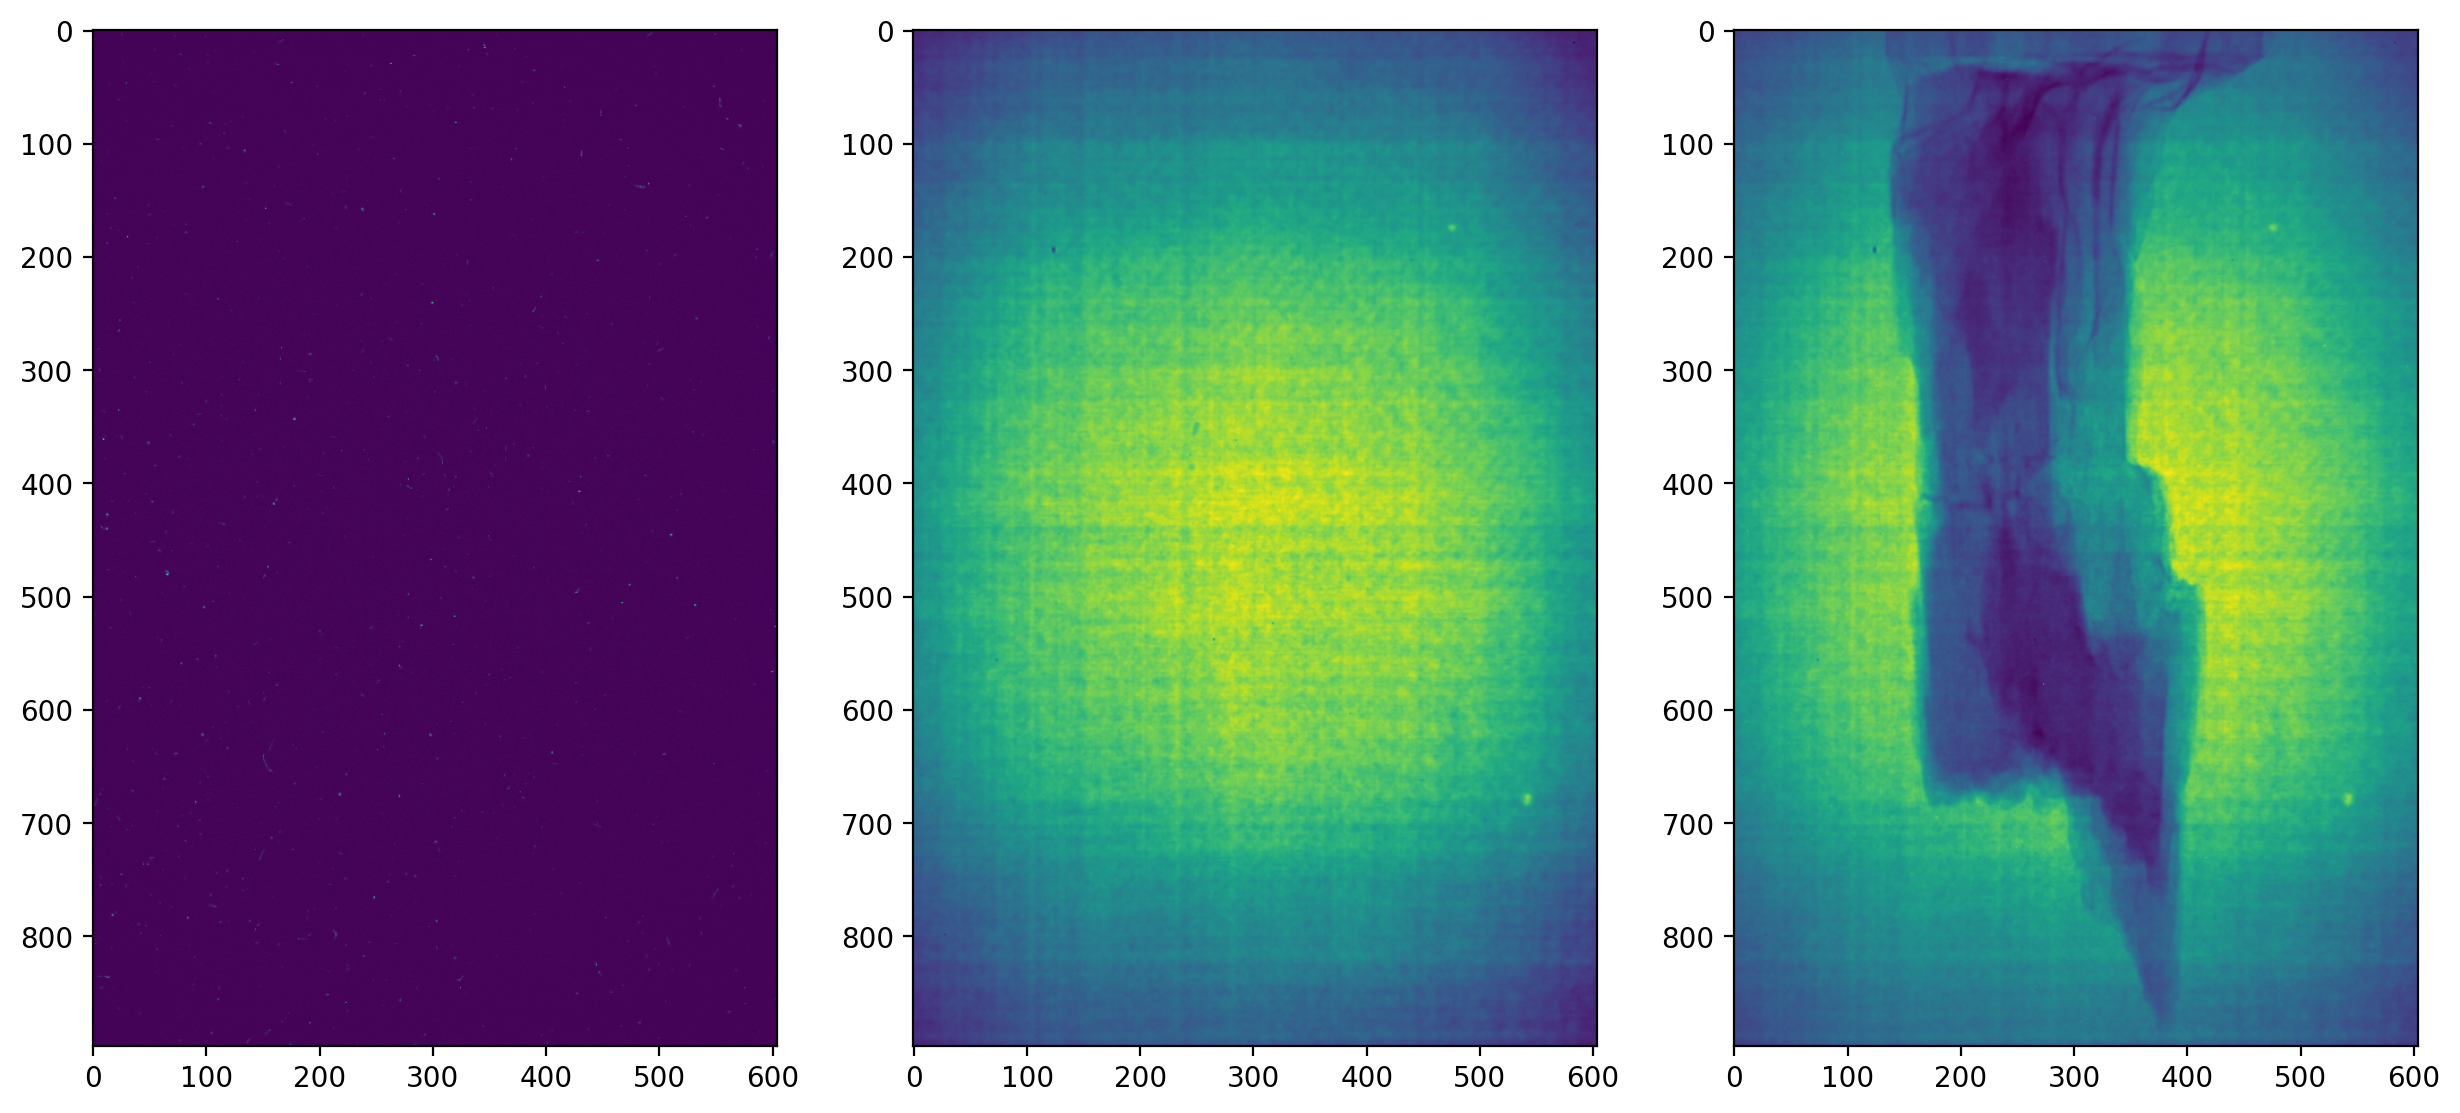

In [17]:
fig,ax = plt.subplots(1,3,figsize=[15,7])
ax[0].imshow(dc)
ax[1].imshow(ob)
ax[2].imshow(proj[0]);

## Preprocessing
Here the projections needs to be prepared for reconstruction. Typical operations are 
- Cropping
- Normalization (possibly with scattering correction)

### Normalize 
Create a image normalization instance from the imaging algorithms package. Here with short name _ia_.



In [18]:
norm = ia.NormalizeImage(True) # True for use logarithm
norm.setReferences(ob,dc)
cproj = proj.copy()
norm.process(cproj)

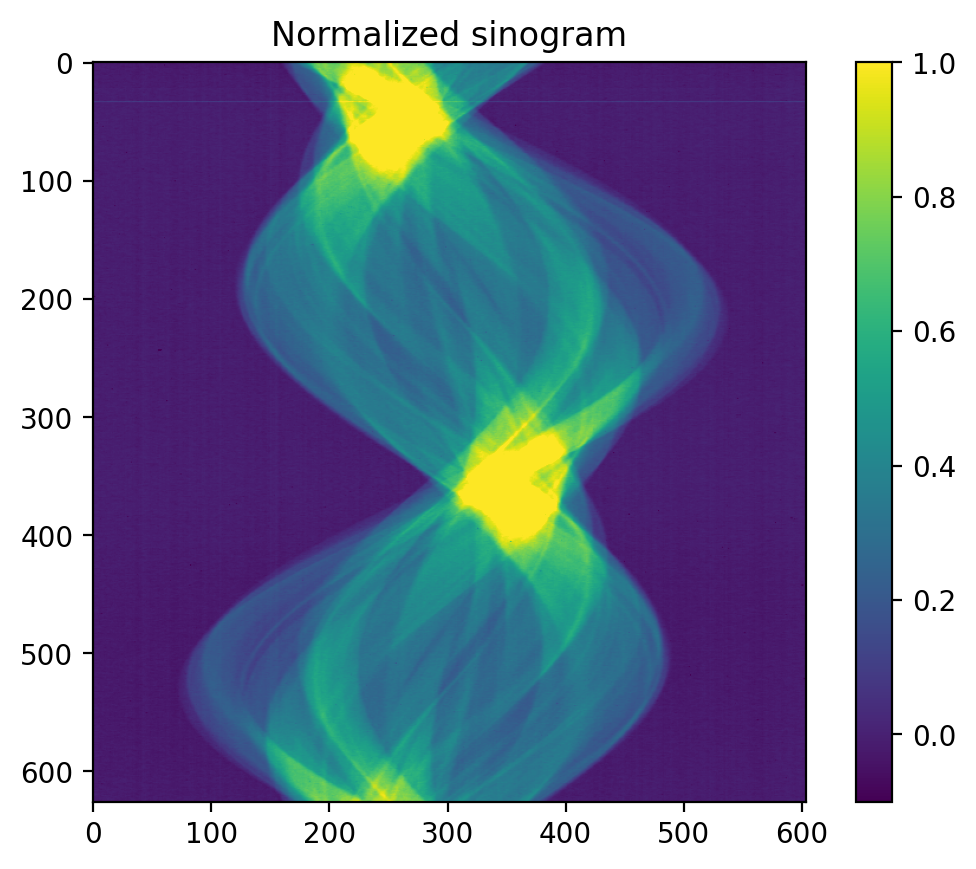

In [19]:
fig,axes=plt.subplots(1)
a0=axes.imshow(cproj[:,400,:], vmin=-0.1,vmax=1); 
axes.set_title('Normalized sinogram')
fig.colorbar(a0,ax=axes);


## Looking at the detection image and its histogram

The detection image is used by the cleaning algorithm to identify the spots. This happens in the background when you call the cleaning.
I can however be interesting to inspect it to get a feeling on how the information is distributed.

In [20]:
msc.setCleanMethod(ia.MorphDetectAllSpots,ia.MorphCleanReplace)
msc.useThreading(True)
di = msc.detectionImage(cproj[0,200:600],True)

ValueError: resize only works on single-segment arrays

The output of the detectionImage function is a dictionary with the entries "dark" and "bright" detection images focussing on dark or bright spots. Both cases can occur if you feed the function with a normalized image.

The next cell shows the resulting detection image. Here, we use the compressed histogram to increase the threshold sensitivity.
The compressed histogram is useful for data with few outliers as it only shows data in a specified quantile.

NameError: name 'di' is not defined

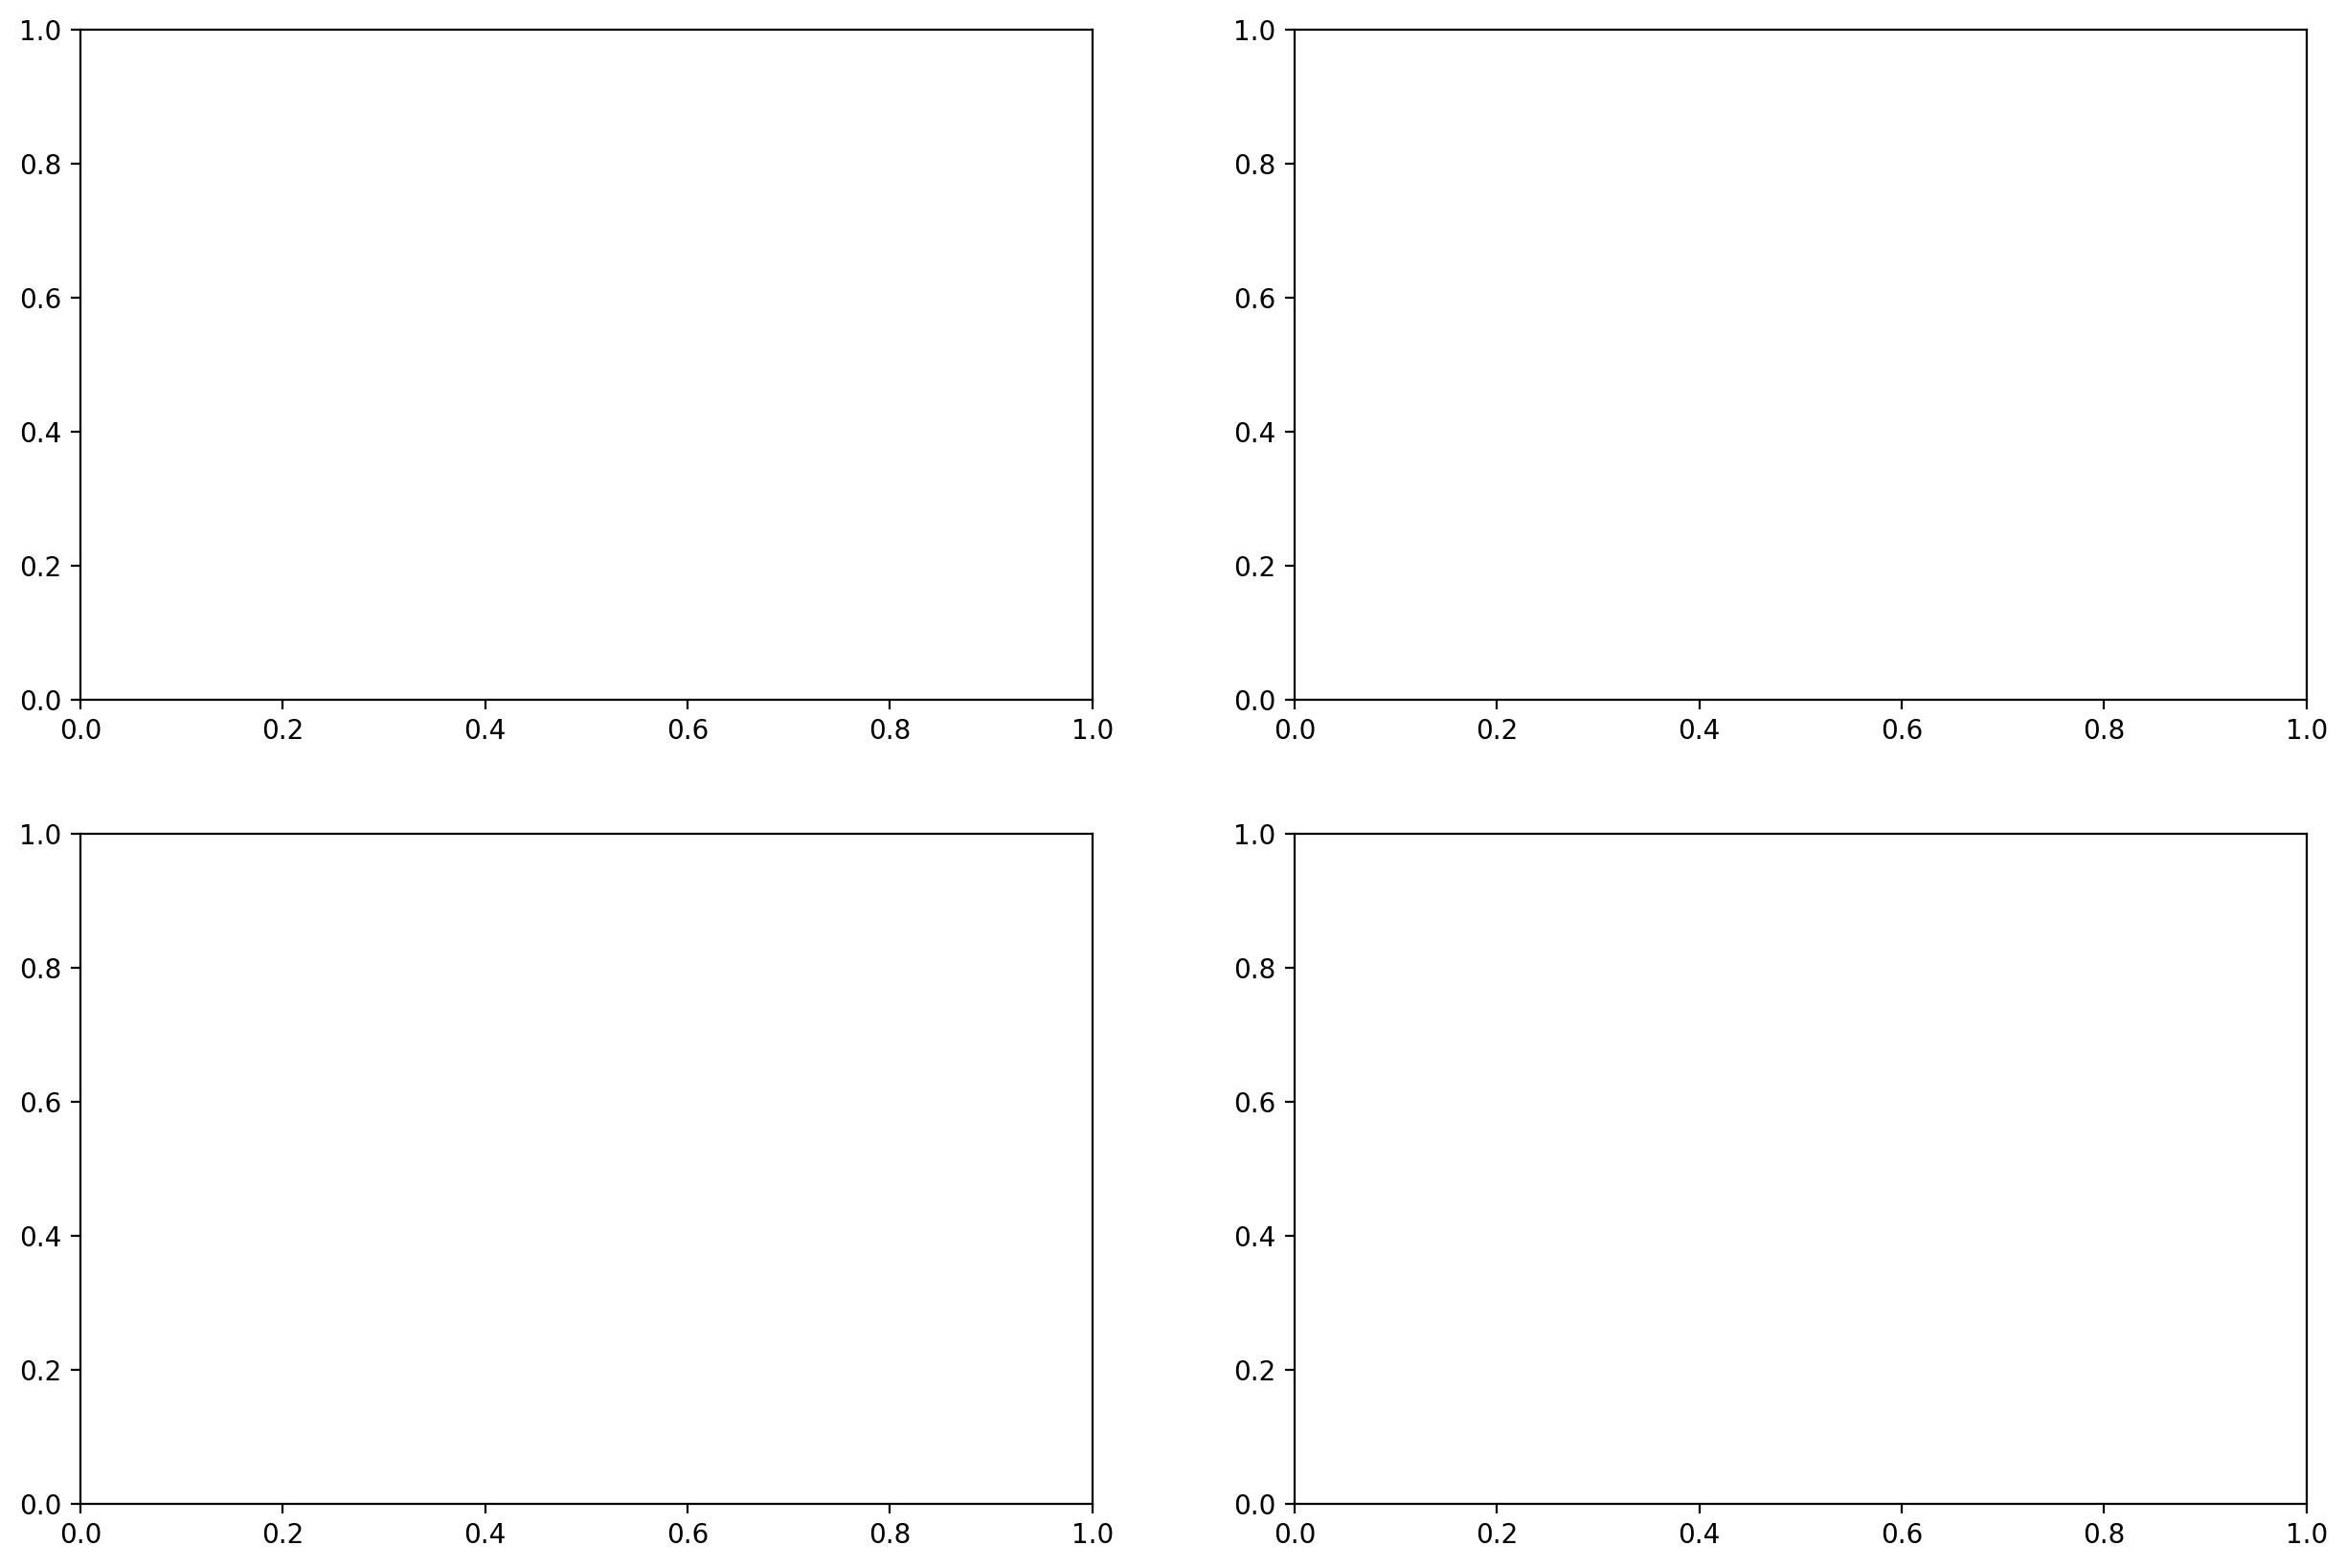

In [21]:
level = 0.99

fig,ax=plt.subplots(2,2,figsize=(15,10))
ax= ax.ravel()
h,a = amg.compressed_histogram(di['dark'].ravel(),bins=1000)
ch  = np.cumsum(h)/np.sum(h)
th  = a[np.min(np.where(level<ch))]

ax[1].plot(a[:-1],ch)
ax[1].set_title('Cumulative histogram')
ax[1].axhline(level,label='{0}%'.format(level*100),color='crimson')
ax[1].axvline(th,label='Threshold = {0:0.5f}'.format(th),color='green')
ax[1].legend()
ax[0].imshow(di['dark'],vmin=0,vmax=th)
ax[0].set_title('Dark')

h,a = amg.compressed_histogram(di['bright'].ravel(),bins=1000)
ch  = np.cumsum(h)/np.sum(h)
th  = a[np.min(np.where(level<ch))]

ax[3].plot(a[:-1],ch)
ax[3].set_title('Cumulative histogram')
ax[3].axhline(level,label='{0}%'.format(level*100),color='crimson')

ax[3].axvline(th,label='Threshold = {0:0.5f}'.format(th),color='green')
ax[3].legend()

ax[2].imshow(di['bright'],vmin=0,vmax=th)
ax[2].set_title('Bright');

__Note__: I have observed that the processing takes long when the sample doesn't have any contact with the horizontal image border. The detection performance is also degraded. Future task to address.

## Cleaning spots
### Single image

In [13]:
msc.setCleanMethod(ia.MorphDetectAllSpots,ia.MorphCleanReplace)
msc.useThreading(False)
msc.setThresholdByFraction(True)
msc.setLimits(applyClamp=False,vmin=-0.1,vmax=12.0,maxarea=200)
msc.setCleanMethod(ia.eMorphDetectionMethod.MorphDetectAllSpots, ia.eMorphCleanMethod.MorphCleanFill)
cleaned = cproj[:,200:600].copy()
msc.process(cleaned[0],th=[0.999,0.999],sigma=[0.1,0.1])

Process 2D: py::array_t<float> &x, std::vector<float> &th, std::vector<float> &sigma


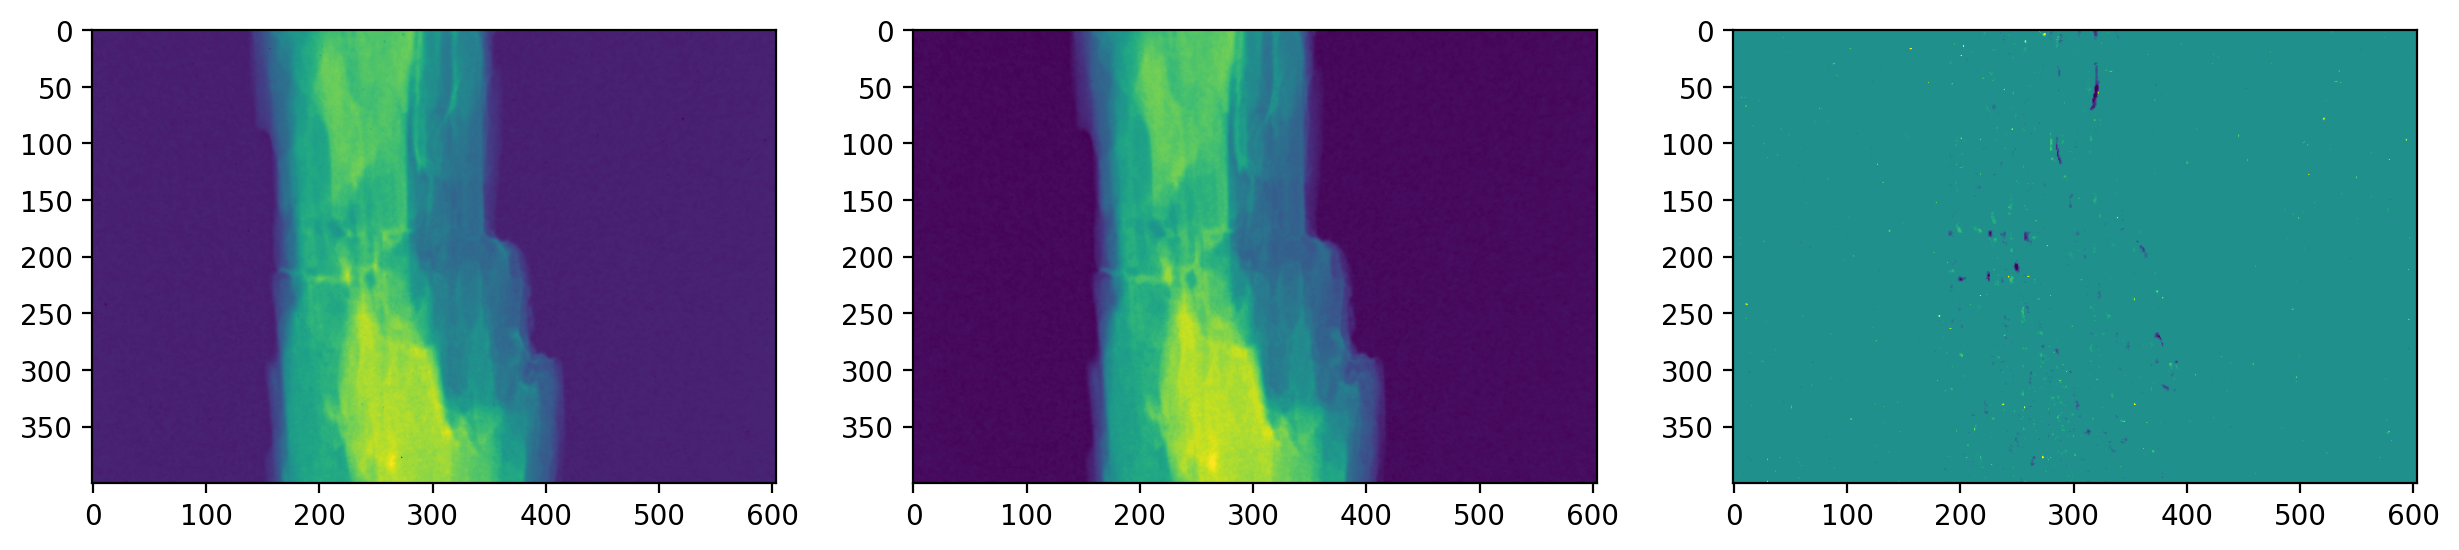

In [14]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

ax[0].imshow(cproj[0,200:600])
ax[1].imshow(cleaned[0])
ax[2].imshow(cleaned[0]-cproj[0,200:600],vmin=-0.1,vmax=0.1);

### Cleaning a stack of images

In [15]:
msc.setCleanMethod(ia.MorphDetectAllSpots,ia.MorphCleanReplace)
msc.useThreading(False)
cleaned = cproj[:,200:600].copy()
msc.process(cleaned[0],th=0.999,sigma=0.1)

Process 2D: py::array_t<float> &x, float th, float sigma


In [28]:
msc=ia.MorphSpotClean()
msc.useThreading(True)
print(msc.isThreaded())
msc.setThresholdByFraction(True)
msc.setLimits(applyClamp=False,vmin=-0.1,vmax=12.0,maxarea=30)
msc.setCleanMethod(ia.eMorphDetectionMethod.MorphDetectAllSpots, ia.eMorphCleanMethod.MorphCleanFill)
cleaned = cproj[:,200:600].copy()
msc.process(cleaned,th=[0.9999,0.9999],sigma=[0.01,0.01]) 

True
Process 3D: py::array_t<float> &x, std::vector<float> &th, std::vector<float> &sigma


Text(0.5, 1.0, 'm=-0.00001, s=0.00520')

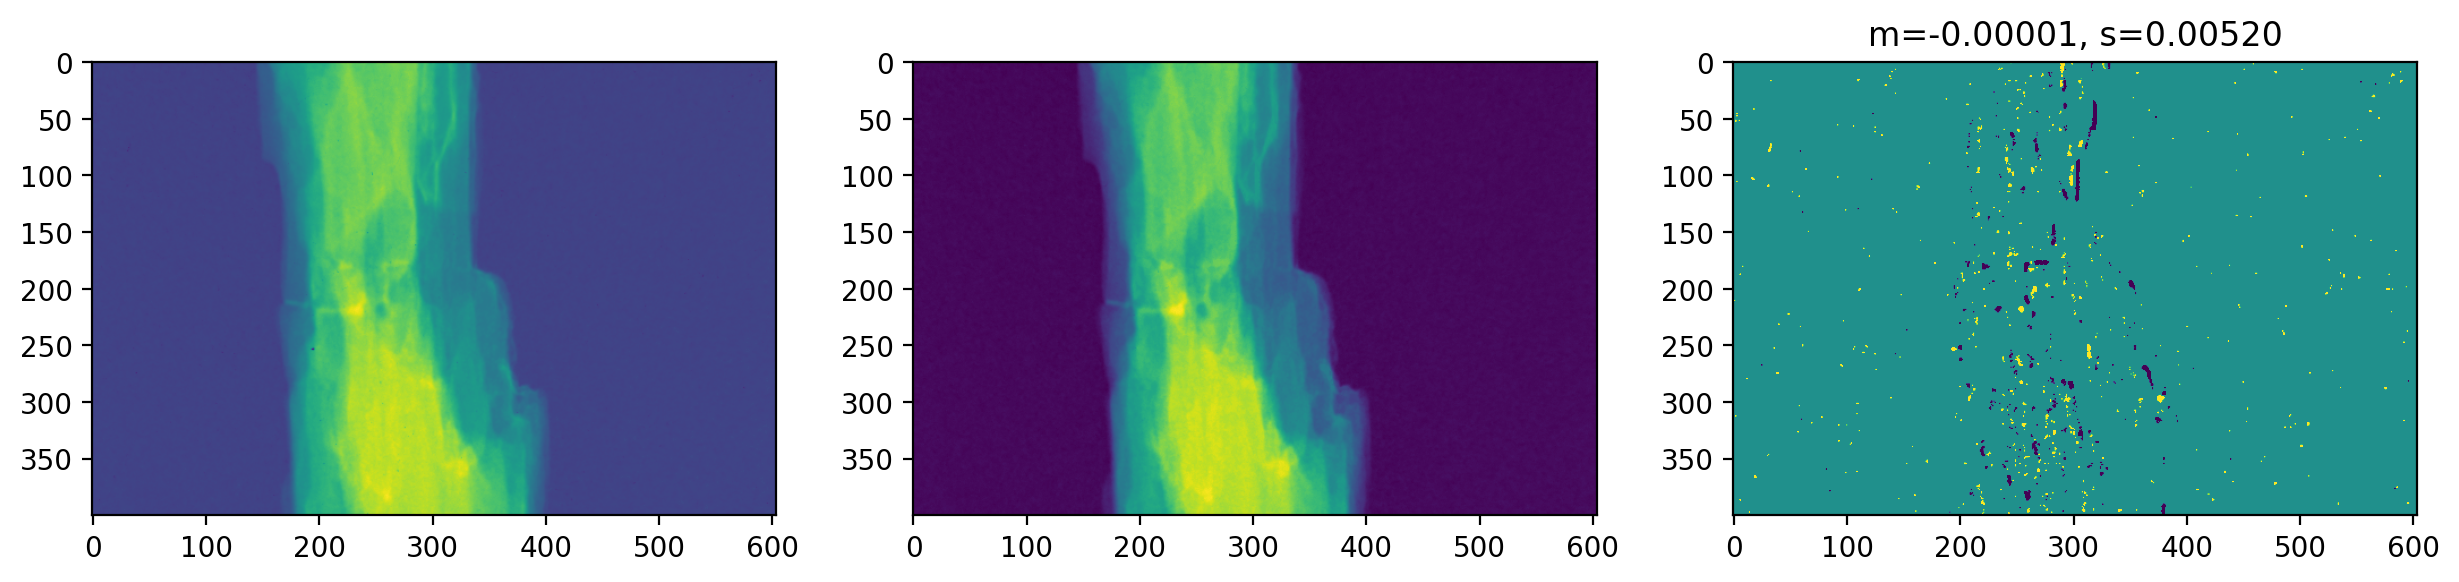

In [29]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
idx = 10
ax[0].imshow(cproj[idx,200:600])
ax[1].imshow(cleaned[idx])
diff= cleaned[idx]-cproj[idx,200:600]
m = diff.mean()
s = diff.std()
ax[2].imshow(cleaned[idx]-cproj[idx,200:600],vmin=m-2*s,vmax=m+2*s);
ax[2].set_title("m={0:0.5f}, s={1:0.5f}".format(m,s))